___
# PROJETO 1

## <font color='red'>Lucas Henrique Lemes Silva</font>
___

## <font color='blue'>TÍTULO DO SEU PROJETO</font>

## Introdução

A motivação para a escolha de comparar os aposentados homens com aposentados mulheres veio do desejo de tentar compreender se em pleno século vinte e um haveria muita diferença entre esses dois grupos.

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.

Como exemplo de estudos semelhantes podemos citar : 
- http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-30982010000200005 
Esse estudo realiza comparação entre os aposentados dos dois sexos que possuem emprego ou não.

- http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-20032006000300006
Esse estudo é semelhante pois compara varias váriaveis em relaçao ao sexo dos aposentados.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Lucas\Documents\Ciência  dos Dados\Projeto 1


In [3]:
#Leitura da base já em formato de DataFrame e extensão .csv
dados = pd.read_csv('PES2014.csv', sep=',')

___

In [47]:
d = pd.DataFrame()

d = dados[dados.V9122 == 2]

In [48]:
d["Sexo"] = dados.V0302.astype('category')
d["Ler_Escrever"] = dados.V0601.astype('category')
d["Estado_Civil"] = dados.V4011.astype('category')
d["trabalho"] = dados.V9001.astype('category')
d["Regiao"] = dados.UF
d["escolaridade"] = dados.V4803
d["salario"] = dados.V4742


C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [49]:
d = d[(d.V4742 != 999999999999) & (~d.V4742.isnull())]

Masculino    50.8
Feminino     49.2
Name: Sexo, dtype: float64 



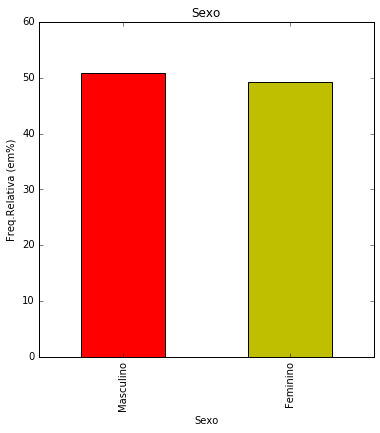

In [50]:
n = d.shape[0]

d.Sexo.cat.categories = ('Feminino','Masculino')

ut1 = ((d.Sexo.value_counts()/n)*100).round(decimals=1)

print(ut1,'\n')

plot = ut1.plot(kind='bar',title='Sexo',figsize=(6, 6),color = ('r','y'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sexo')


Podemos notar através desde gráfico uma divisão praticamente igual entre o sexo dos aposentados da pesquisa, sendo que 50.8% dos aposentados são Homens e 49.2% dos aposentados são mulheres. 

In [51]:
d.Regiao[(dados.UF >= 10) & (dados.UF < 20)] = 1
d.Regiao[(dados.UF >= 20) & (dados.UF < 30)] = 2
d.Regiao[(dados.UF >= 30) & (dados.UF < 40)] = 3
d.Regiao[(dados.UF >= 40) & (dados.UF < 50)] = 4
d.Regiao[(dados.UF >= 50) & (dados.UF < 60)] = 5

d.Regiao = d.Regiao.astype('category')
d.Regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')

#ut100 = d.Regiao.value_counts().round(decimals=1)
#print(ut100,'\n')

#plot = ut100.plot(kind='bar',title='Regiao',figsize=(6, 6),color=('b','g','k','r','m','c','y'))
#plt.ylabel('Freq.AB')
#plt.xlabel('Regiões')

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWa

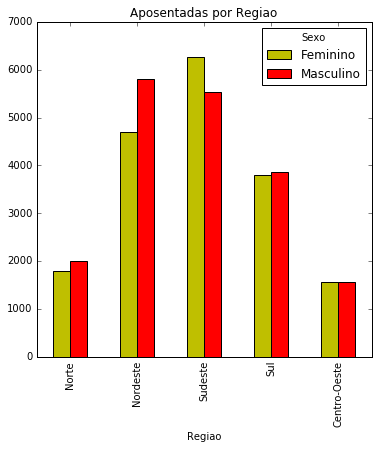

In [52]:
ut30 = pd.crosstab(d.Regiao, d.Sexo)
plot = ut30.plot(kind='bar',title='Aposentadas por Regiao',figsize=(6, 6),color=('y','r'))

Através da análise do gráfico acima podemos tirar algumas conclusões importantes. A primeira delas é que podemos visualizar a predominância de aposentados na região Sudeste, na qual temos o maior número de oportunidade de emprego. A segunda é que não há uma diferença expressiva no número de aposentados das regiões Norte, Sul, e Centro-Oesto, fato observado apenas nas regiões Sudeste e Nordeste.

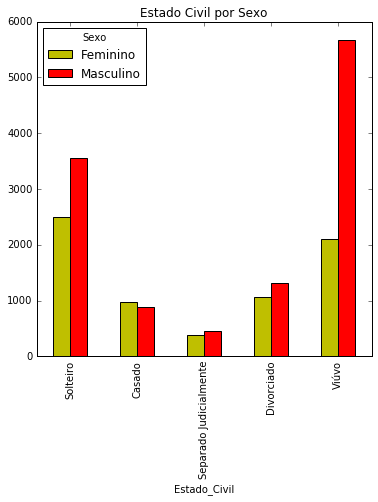

In [53]:
d.Estado_Civil.cat.categories = ('Solteiro','Casado', 'Separado Judicialmente', 'Divorciado', 'Viúvo')
ut31 = pd.crosstab(d.Estado_Civil, d.Sexo)
plot = ut31.plot(kind='bar',title='Estado Civil por Sexo',figsize=(6, 6),color=('y','r'))

Através do grafico acima, a informação que se destava é o numero de aposentados Homenes que provavelmente moram sozinho pois são viuvos. Esse grande número pode ser explicado pela idade média que as mulheres consegue alcançar, morrendo um pouco antes que os homens.

In [11]:
#Dados só dos aposentados masculinos
m = d[d.V0302 == 4]

#Dados só de aposentados femininos
f = d[d.V0302 == 2]

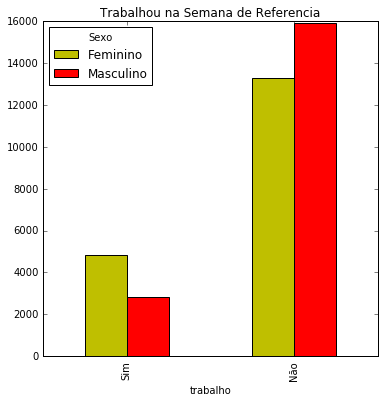

In [36]:
d.trabalho.cat.categories = ('Sim','Não')
ut60 = pd.crosstab(d.trabalho, d.Sexo)
plot = ut60.plot(kind='bar',title='Trabalhou na Semana de Referencia',figsize=(6, 6),color=('y','r'))

Com esse gráfico conseguimos concluir que aproximadamente 5000 aposentados Homens e 3000 aposentadas Mulheres, além da aposentadoria buscam por trabalhar para complementarem a renda da familia.

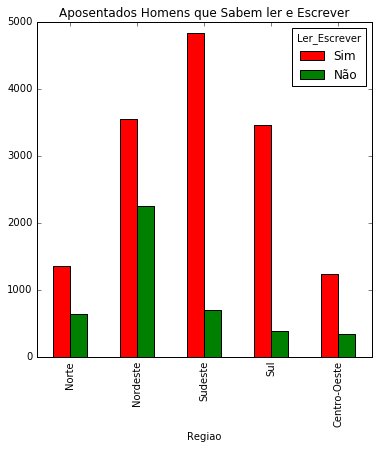

In [13]:
#quantas aposentados homens sabem ler ou escrever por regiao

m.Ler_Escrever.cat.categories = ('Sim', 'Não')
ut7 = pd.crosstab(m.Regiao, m.Ler_Escrever)
#print(ut7)

plot = ut7.plot(kind='bar',title='Aposentados Homens que Sabem ler e Escrever',figsize=(6, 6),color=('r','g'))

Apartir do gráfico acima conseguimos perceber que em todas regiões do país o número de analfabetos Homens é menor que o número dos alfabetizados. Porém vale destacar que na região nordeste o número de analfabetos é bem significante. Isso pode ter acontecido devido ao nível de instrução da região ou porque os empregos oferecidos na região, em sua maioria, não tem como requisito saber ler e escrever. 

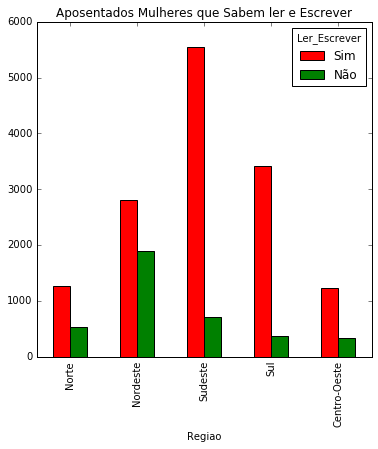

In [14]:
#quantas aposentados mulheres sabem ler ou escrever por regiao

f.Ler_Escrever.cat.categories = ('Sim', 'Não')
ut8 = pd.crosstab(f.Regiao, f.Ler_Escrever) 
#print(ut8)

plot = ut8.plot(kind='bar',title='Aposentados Mulheres que Sabem ler e Escrever',figsize=(6, 6),color=('r','g'))

Apartir do gráfico acima conseguimos perceber que em todas regiões do país o número de analfabetos Mulheres é menor que o número dos alfabetizados. Porém vale destacar que na região nordeste o número de analfabetos é bem significante. Isso pode ter acontecido devido ao nível de instrução da região ou porque os empregos oferecidos na região, em sua maioria, não tem como requisito saber ler e escrever.

In [15]:
#boxplot do salario por regiao dos aposentados homens

a = m

a["salario"] = dados.V4742

a.salario = a.salario.astype('float')

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
b = pd.DataFrame([a.salario[a.Regiao == 'Norte'], a.salario[a.Regiao == 'Nordeste'], a.salario[a.Regiao == 'Sudeste'], a.salario[a.Regiao == 'Sul'],a.salario[a.Regiao == 'Centro-Oeste']],index = ('Norte','Nordeste','Sudeste','Sul','Centro-Oeste'))
b = b.T

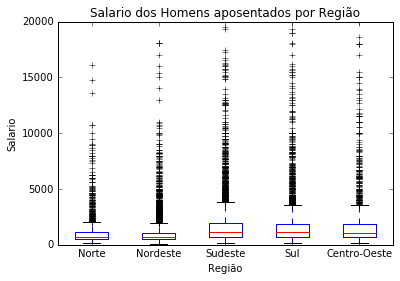

In [27]:
b.plot.box()
plt.ylabel('Salario')
plt.xlabel('Região')
plt.ylim(0,20000)
plt.title('Salario dos Homens aposentados por Região')

Com a análise do boxplot acima podemos perceber que o a maioria dos aposentados Homens das regiões Sudeste, Sul e Centro-Oeste recebem um salário na faixa de 0 a aproximadamente 3000 reais. Essa faixa, nas outras regiões, são ainda menores, entre 0 e aproximadamente 1500 reais. Ainda apartir da analise, percebemos que as regiões Sudeste e Sul possuem mais aposentados com salários com valor maior que os demais regiões.

In [18]:
#boxplot do salario por regiao dos aposentados mulheres

g = f

g["salario"] = dados.V4742

g.salario = g.salario.astype('float')

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


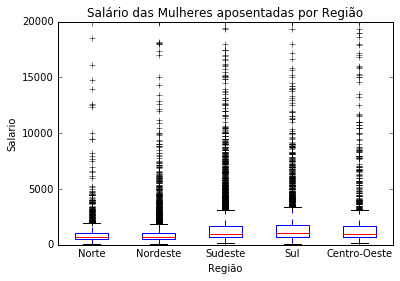

In [28]:
h = pd.DataFrame([g.salario[g.Regiao == 'Norte'], g.salario[g.Regiao == 'Nordeste'], g.salario[g.Regiao == 'Sudeste'], g.salario[g.Regiao == 'Sul'],g.salario[g.Regiao == 'Centro-Oeste']],index = ('Norte','Nordeste','Sudeste','Sul','Centro-Oeste'))
h = h.T

h.plot.box()
plt.ylabel('Salario')
plt.xlabel('Região')
plt.ylim(0,20000)
plt.title('Salário das Mulheres aposentadas por Região')

Com a análise do boxplot acima podemos perceber que o a maioria dos aposentados Mulehres das regiões Sudeste, Sul e Centro-Oeste recebem um salário na faixa de 0 a aproximadamente 3000 reais. Essa faixa, nas outras regiões, são ainda menores, entre 0 e aproximadamente 1500 reais. Ainda apartir da analise, percebemos que as regiões Sudeste e Sul possuem mais aposentados com salários com valor maior que os demais regiões.

In [20]:
#boxplot da escolaridade dos aposentados homens por regiao

c = d

c.escolaridade = c.escolaridade.astype('float')

c.escolaridade[(c.escolaridade > 1) & (c.escolaridade <= 16)]

c = pd.DataFrame([m.escolaridade[m.Regiao == 'Norte'], m.escolaridade[m.Regiao == 'Nordeste'], m.escolaridade[m.Regiao == 'Sudeste'], m.escolaridade[m.Regiao == 'Sul'],m.escolaridade[m.Regiao == 'Centro-Oeste']],index = ('Norte','Nordeste','Sudeste','Sul','Centro-Oeste'))
c = c.T

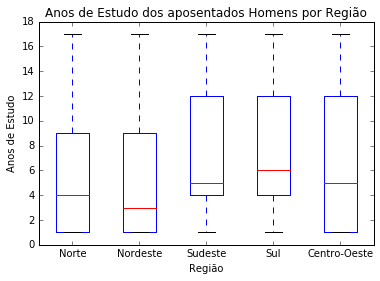

In [21]:
c.plot.box()
plt.ylabel('Anos de Estudo')
plt.xlabel('Região')
plt.title('Anos de Estudo dos aposentados Homens por Região')

Através dos boxplot acima podemos perceber que as regiões nas quais os homens possuem mais anos de estudo são a região Sudeste e Sul. Possivelmente isso deve ter ocorrido pois os empregos nessas duas regiões cobrarem níveis de estudos altos, diferentes das outra regiões que são também mais rurais.

In [22]:
#boxplot da escolaridade dos aposentados mulheres por regiao

e = d

e.escolaridade = e.escolaridade.astype('float')

e.escolaridade[(e.escolaridade > 1) & (e.escolaridade <= 16)]

e = pd.DataFrame([f.escolaridade[f.Regiao == 'Norte'], f.escolaridade[f.Regiao == 'Nordeste'], f.escolaridade[f.Regiao == 'Sudeste'], f.escolaridade[f.Regiao == 'Sul'],f.escolaridade[f.Regiao == 'Centro-Oeste']],index = ('Norte','Nordeste','Sudeste','Sul','Centro-Oeste'))
e = e.T

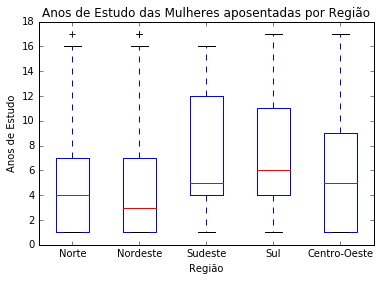

In [23]:
e.plot.box()
plt.ylabel('Anos de Estudo')
plt.xlabel('Região')
plt.title('Anos de Estudo das Mulheres aposentadas por Região')

Assim como no boxplot dos Homens, as regiões nas quais possuem maior nível de escolaridade são a regiao Sudeste e Sul. Vale destacar também que em relaçao aos homens em todas as regiões a maioria das mulheres tem escolaridade abaixo da dos homens, fato possivelmente explicado pela cultura da época em que algumass mulheres eram proibidas de estudar ou trabalhar.

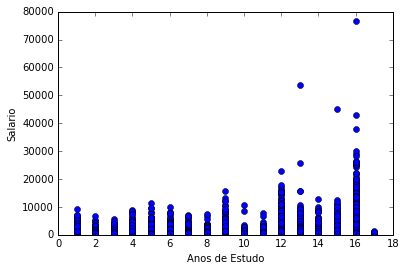

In [31]:
plt.plot(m.escolaridade, m.salario, 'bo')
plt.ylabel('Salario')
plt.xlabel('Anos de Estudo')
plt.show()

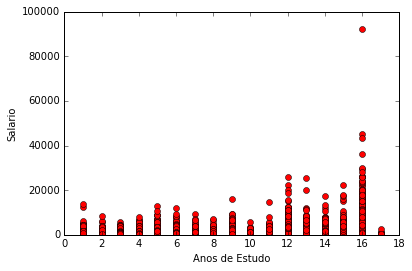

In [32]:
plt.plot(f.escolaridade, f.salario, 'ro')
plt.ylabel('Salario')
plt.xlabel('Anos de Estudo')
plt.show()

Esses gráficos nos mostram uma informação muito importante. Através dele podemos perceber que até um certo número de anos estudados o salário não sofre grandes mudanças, mas apartir do ensino médio(12 anos estudados) quanto maior o nivel de escolaridade dos aposentado maior o sálario recebido por ele. Esse comportamento pode ser reparado também no gráfico das aposentadas mulheres, quanto maior o seu nivel de escolaridade maior o seu salário recebido.

In [25]:
print("Correlação entre Anos de Trabalho e Salário Masculino:", np.corrcoef(m.escolaridade, m.salario)[0,1])
print("Correlação entre Anos de Trabalho e Salário Feminino:", np.corrcoef(f.escolaridade, f.salario)[0,1])

Correlação entre Anos de Trabalho e Salário Masculino: 0.453284448174
Correlação entre Anos de Trabalho e Salário Feminino: 0.45258515538


In [26]:
print("Covariância entre Anos de Trabalho e Salário Masculino:", np.cov(m.escolaridade, m.salario)[0,1])
print("Covariância entre Anos de Trabalho e Salário Feminino:", np.cov(f.escolaridade, f.salario)[0,1])

Covariância entre Anos de Trabalho e Salário Masculino: 4869.43649234
Covariância entre Anos de Trabalho e Salário Feminino: 4641.26832506


___
## Conclusão 

  Apartir da análise de todos os gráficos e boxplot acima podemos perceber que existe uma diferença entre a escolaridade e o salário dos aposentados por região assim como o analfabetismo, fato que pode ser explicado pelas exigências e peculiaridades de cada região do país. Mas ao comparar as mesmas variáveis entre os sexos, essa diferença acaba nao sendo muito grande.
  Além de destacar essas informações, conseguimos também notar que alguns aposentados Homens e Mulheres, possívelmente não estão satisfeito com a aposentadoria que recebem pois estão trabalhando mesmo após receber o direito de aposentadoria para complementar a sua renda.
  Através da comparação entre Homens e Mulheres foi possível notar que a escolaridade influencia muito o resultado salarial do aposentado, fato percebido com os dois sexos. Dessa forma, podemos notar que a desigualdade salarial entre os sexos está diminuindo com os anos. 
  Sendo assim podemos concluir que há desigualdade salarial, escolar e etc entre as regiões do país, devido ao investimento, urbanização e cultura do local. Mas entre o sexo dos aposentados esse fato já não é tão expressivo, o que foi comprovado pelo estudo acima.